In [ ]:
library(tidyverse)

In [105]:
# 1)
# use the readr libraries read_csv method to 
# read the file '2016_renda.csv'. Take a look at the documentation
# for the readr library. What warnings does it give you? 

renda <- read_csv('2016_renda.csv')

Parsed with column specification:
cols(
  Any = col_double(),
  Codi_Districte = col_double(),
  Nom_Districte = col_character(),
  Codi_Barri = col_double(),
  Nom_Barri = col_character(),
  Seccio_Censal = col_double(),
  Import_Euros = col_double()
)



In [106]:
# Note the data type that read_csv returns
# (you can use "class" like always!)
# What is it? 

In [107]:
# A tibble is the Tidyverses version of a 
# dataframe. It has everything a dataframe has,
# but has some key differences: 

# - Tibbles do not print all the rows!
# - Tibbles print out the type of each column.
# - Tibbles do not coerce types (dataframes will often coerce strings into factors, which may be a headache)
# - Subsetting a tibble (with []) will always return a tibble. Never a vector.

In [108]:
# 2)
# 2 of the columns, Nom_Districte and Nom_Barri were parsed 
# as "character" columns. Let's change them into "factor" columns
# by using the parse_factor function from the readr library. 
# Do you remember a function from another tidyverse library
# that can be used to change a column? 

renda <- renda %>% mutate(Nom_Districte = parse_factor(Nom_Districte),
                          Nom_Barri = parse_factor(Nom_Barri))

In [109]:
# 3)
# You learned to work with the dplyr library to manipulate
# dataframes. Let's put some of that knowledge to work!
# Get the Barris with the top 5 mean Import_Euros per Barri. 

renda %>% group_by(Nom_Barri) %>% summarize(import = mean(Import_Euros)) %>% arrange(desc(import)) %>% head(5)

`summarise()` ungrouping output (override with `.groups` argument)



Nom_Barri,import
<fct>,<dbl>
les Tres Torres,27626.82
Pedralbes,26720.29
Sant Gervasi - Galvany,24623.58
Sant Gervasi - la Bonanova,23794.33
Sarrià,23012.88


In [110]:
# 4)
# Summarize is how we "aggregate" or "reduce" a column of each
# "mini-dataframe" in each group down to a single value. 

# Let's create a custom function that you can use with summarize().
# This function should select the nth largest value in the given column/group
# hint: the function should take a vector and return a scalar

nth_largest <- function(vals, n) {
    v <- sort(vals, decreasing=TRUE)
    v[n]
}

# use your function to get the 3rd highest Import_Euros per district. 

renda %>% group_by(Nom_Districte) %>% summarize(second = nth_largest(Import_Euros, 10))

`summarise()` ungrouping output (override with `.groups` argument)



Nom_Districte,second
<fct>,<dbl>
Ciutat Vella,12165
Eixample,22009
Sants-Montjuïc,16152
Les Corts,23631
Sarrià-Sant Gervasi,29364
Gràcia,19016
Horta-Guinardó,16454
Nou Barris,14363
Sant Andreu,15856


In [111]:
# 5)
# Now use your function to get a dataframe with only the
# top-3 highest-earning census tract per district. 

renda %>% group_by(Nom_Districte) %>% filter(Import_Euros > nth_largest(Import_Euros, 10)) %>%
    mutate(dif = max(Import_Euros) - min(Import_Euros))

Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Euros,dif
<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
2016,1,Ciutat Vella,1,el Raval,20,13194,3251
2016,1,Ciutat Vella,1,el Raval,21,12340,3251
2016,1,Ciutat Vella,2,el Gòtic,22,15591,3251
2016,1,Ciutat Vella,2,el Gòtic,23,13615,3251
2016,1,Ciutat Vella,3,la Barceloneta,32,13006,3251
2016,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",43,15122,3251
2016,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",44,14553,3251
2016,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",52,14961,3251
2016,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",55,14680,3251


In [112]:
# 6)
# Note that you probably ended up with a "grouped_df" object
# instead of a normal tibble. You can get a normal tibble back
# by calling ungroup() on the grouped_df. But before you do,
# let's see the implication of the grouped_df (which looks the same
# when printed out!). 

# Try adding a column with the difference between the richest tract
# and the 3rd richest tract in each Districte, so that you have a new 
# dataframe of the same size, but with an extra column. 

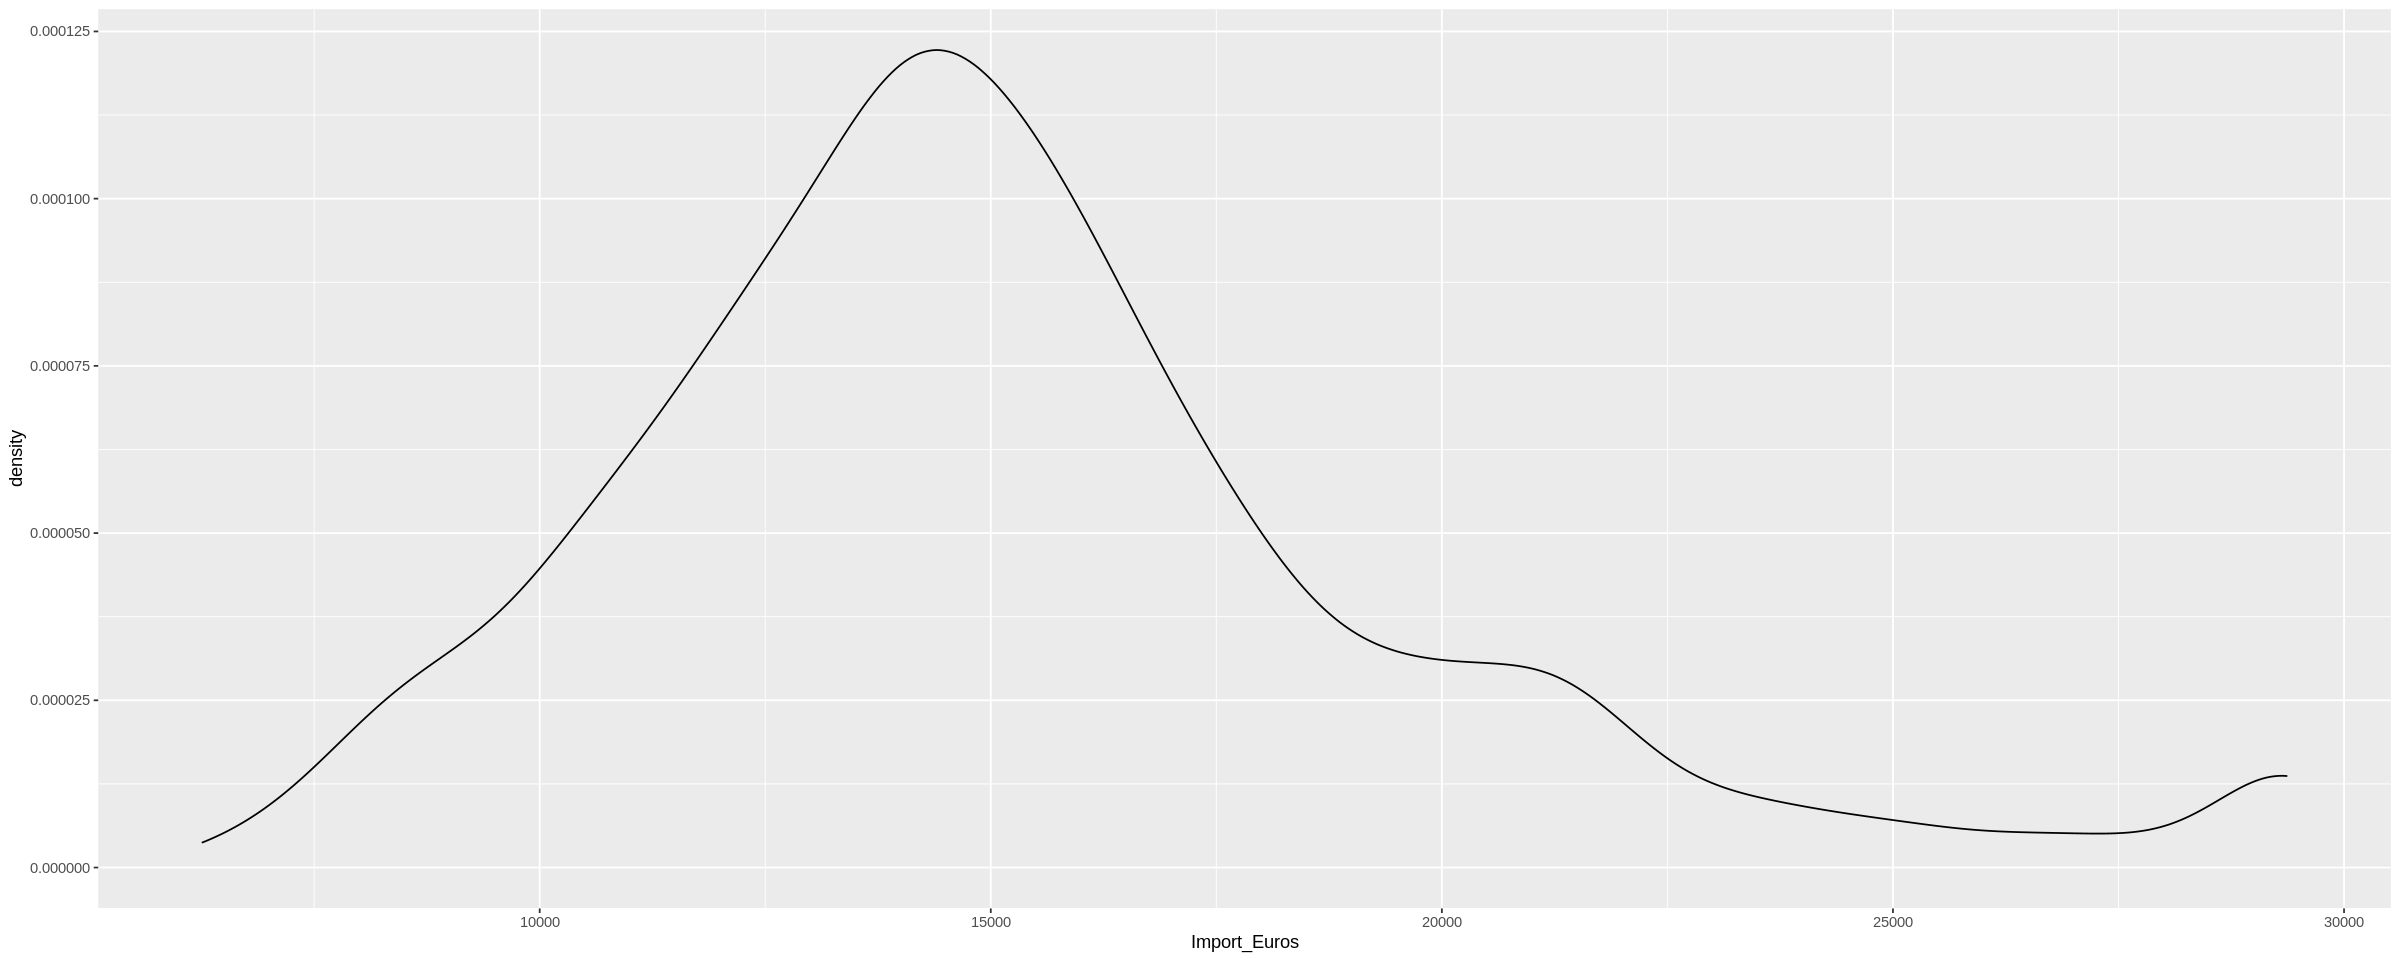

In [113]:
# Let's do some plotting with the ggplot2 skills we learned!
# Plot a kernel density function of the Import_Euros on the 
# whole dataset

renda %>% ggplot(aes(Import_Euros)) + geom_density()

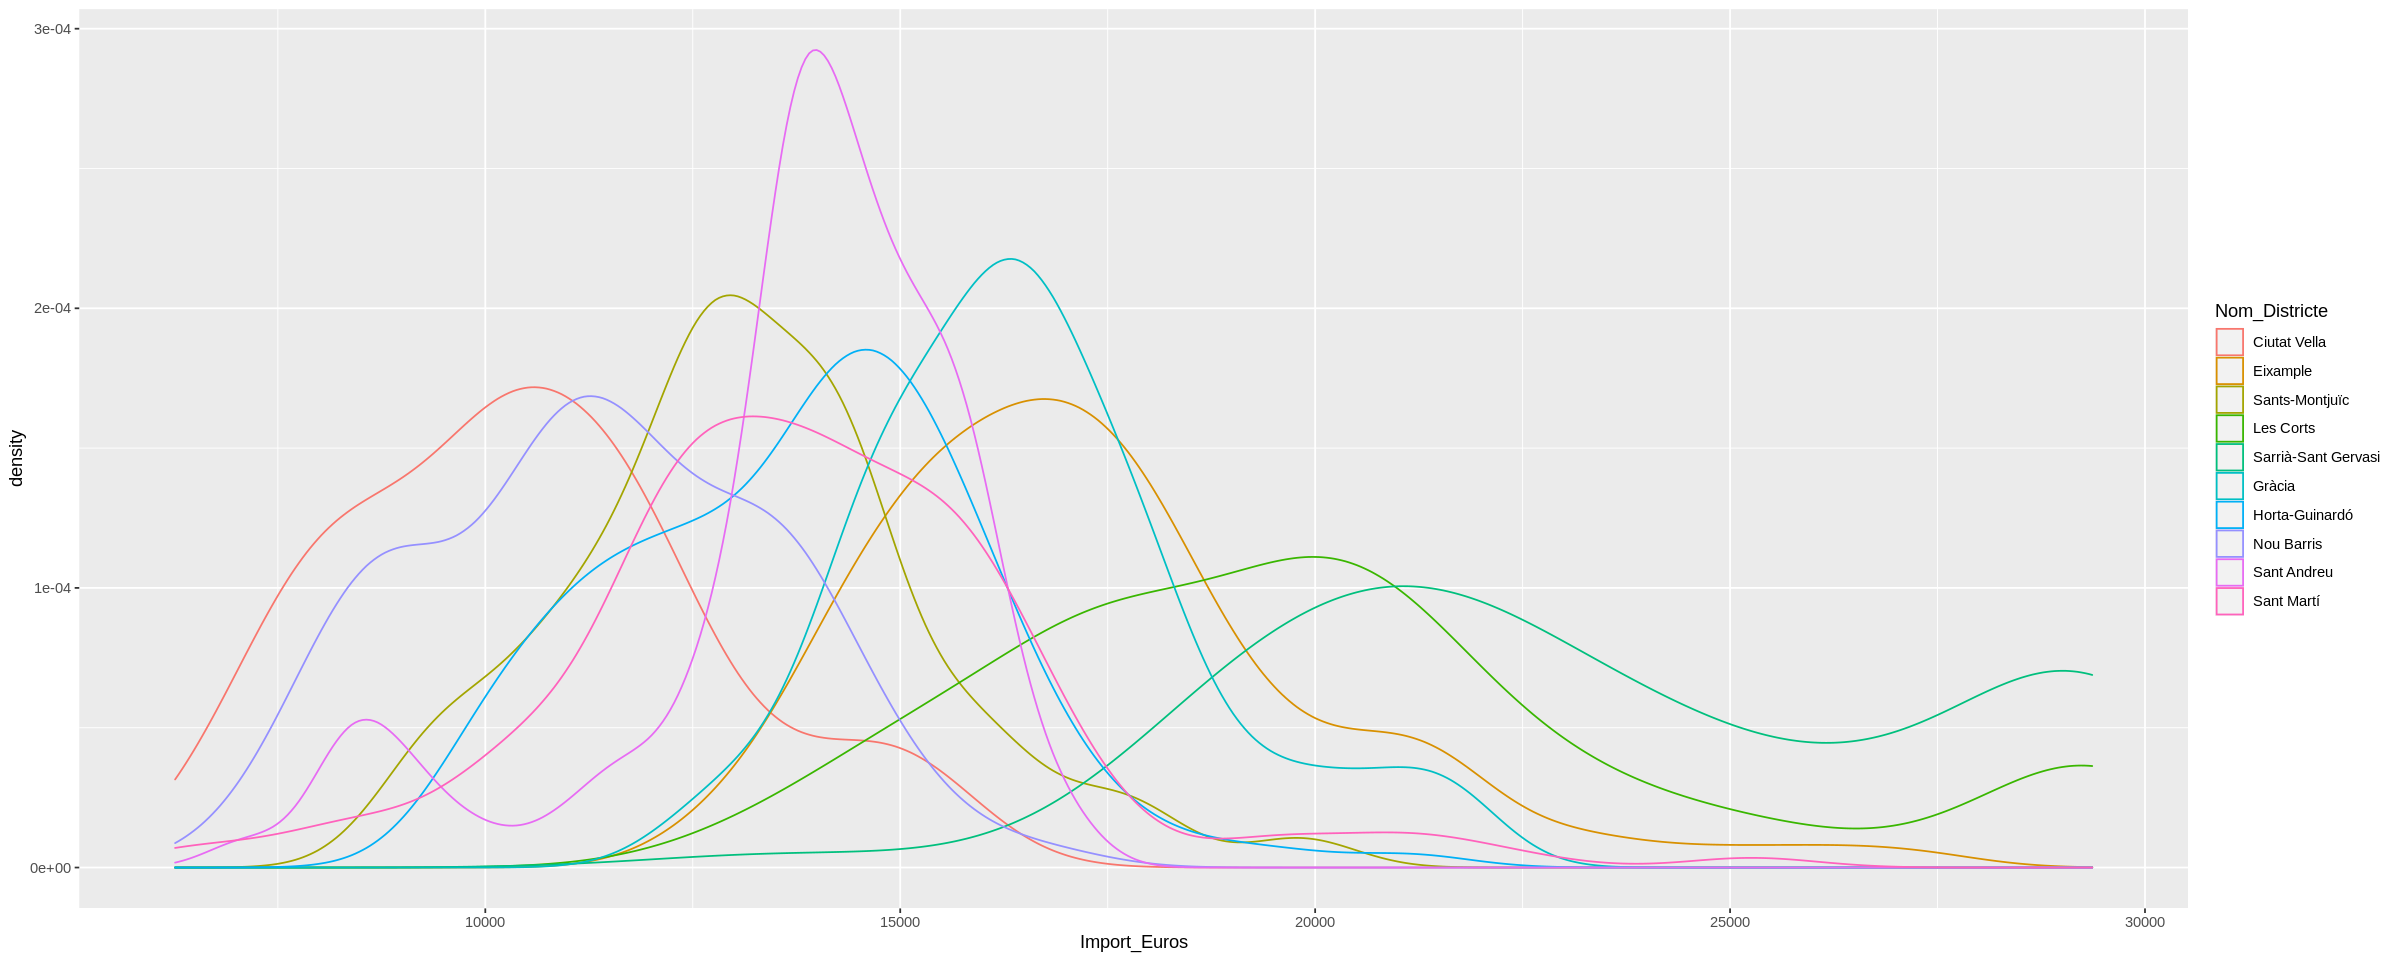

In [114]:
# Now lets plot the kernel density of the Import_Euros
# per Districte! 

# HINT: Use the following to change the size of your plot.
# Pick a size that's big enough to help you see what's happening:
# options(repr.plot.width=2, repr.plot.height=2)


renda %>% ggplot(aes(Import_Euros, color = Nom_Districte)) + geom_density()

`summarise()` ungrouping output (override with `.groups` argument)



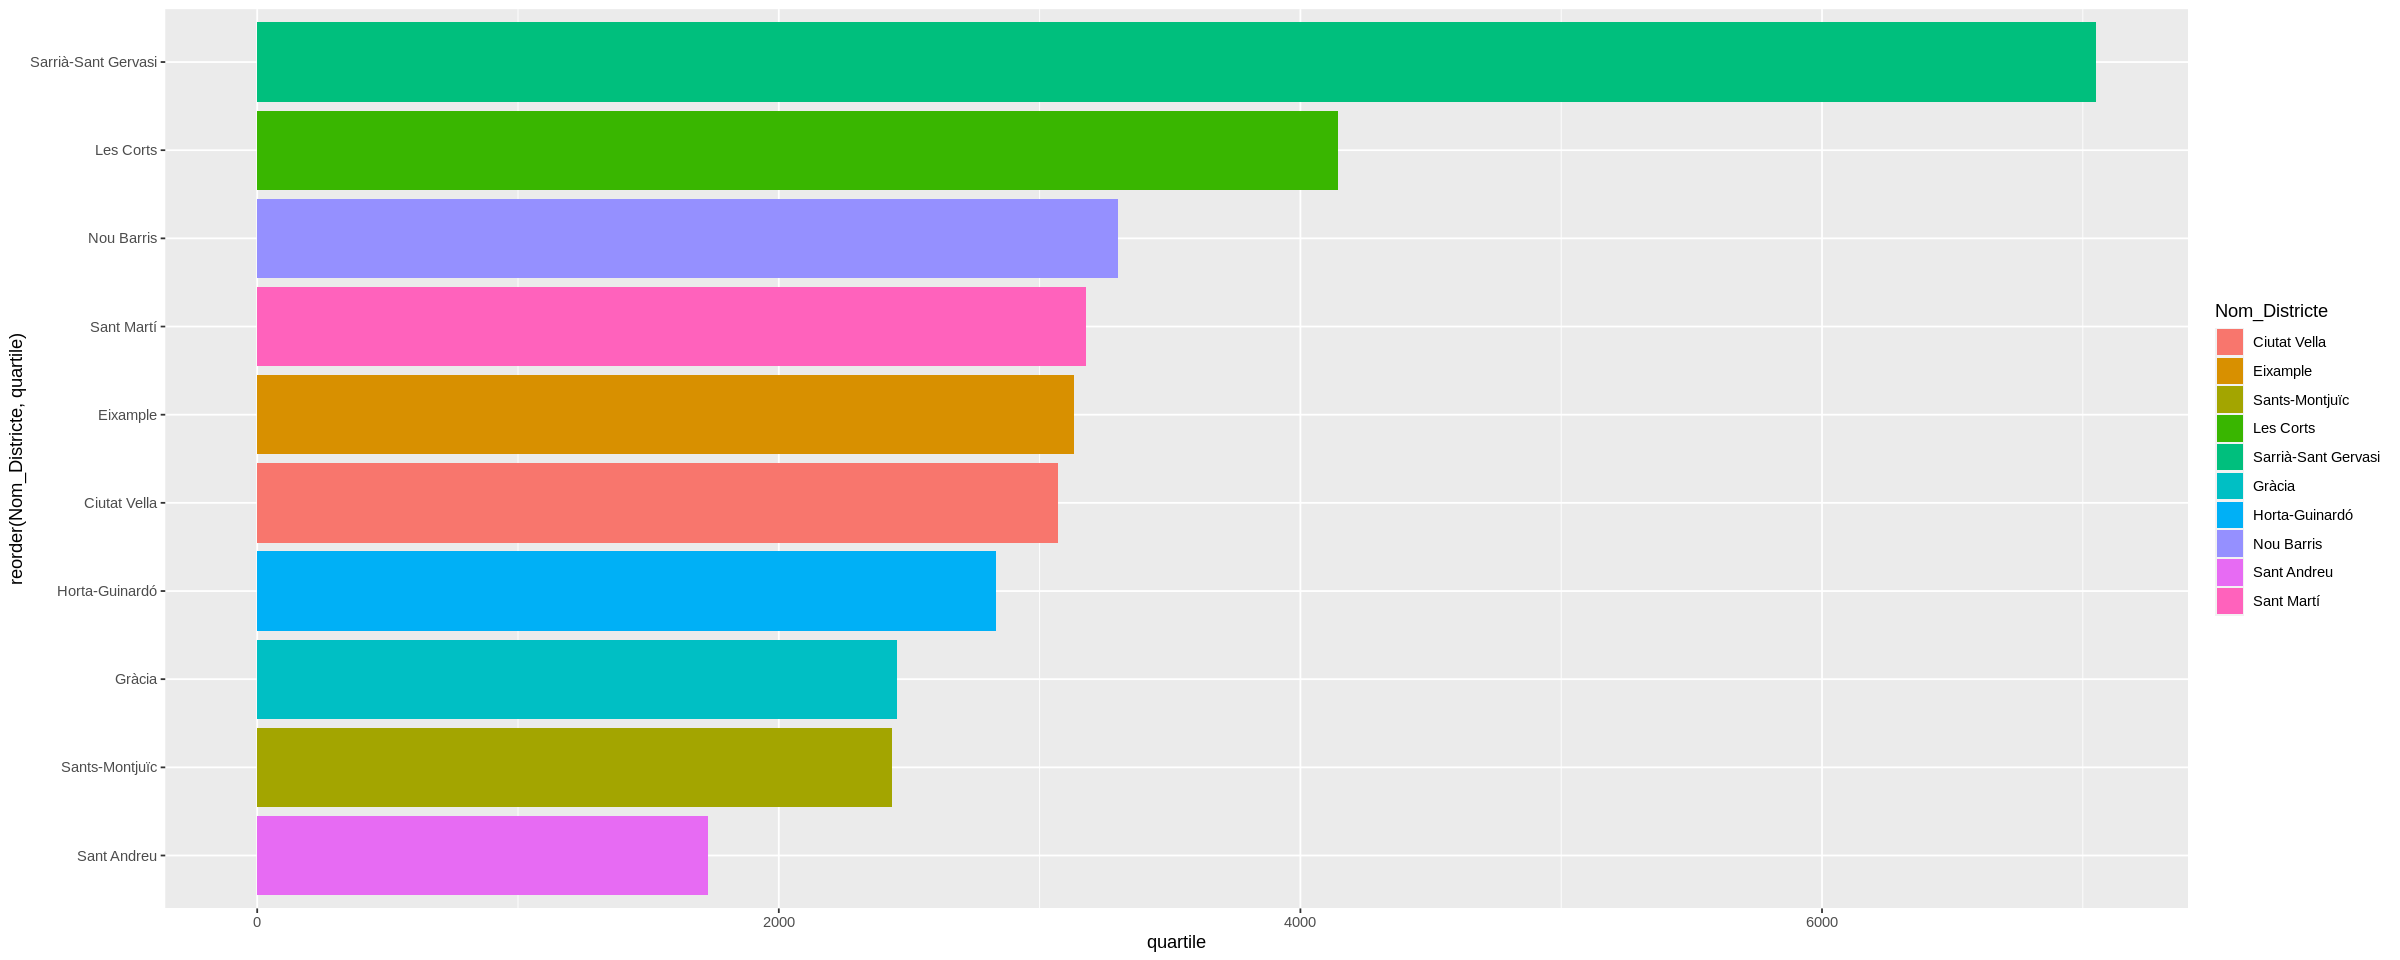

In [116]:
# Hrm, a lot of those densities look like they have
# a lot of mass in either their left or right tail, 
# almost a second mode. 
#
# Instead of comparing the minimum and maximum income
# districts to get a measure of inequality, let's compare
# the size of the interquartile range of each Districte. A small
# interquartile range will indicate a large swathe of homogenous
# incomes. The interquartile range is from the .25 quantile to the 
# .75 quantile of an ordered set of random variables. You can use 
# the quantile function to get it.

# Plot a horizontal bar chart with the size of the interquartile ranges.
# Order the bars in descending order (HINT: use "reorder").

inequalities <- renda %>% 
                group_by(Nom_Districte) %>% 
                summarize(quartile = quantile(Import_Euros, .75) - quantile(Import_Euros, .25), 
                          min_max = max(Import_Euros) - min(Import_Euros)) %>%
                arrange(quartile)

inequalities %>%
                ggplot(aes(x=quartile, y=reorder(Nom_Districte, quartile), fill=Nom_Districte, reorder=quartile)) + 
                geom_col()

In [117]:
# Now compute the "inequality" per district as the difference between the min and max
# Import_Euros within the Districte. Create a dataframe (tibble) with both measures
# and compare them. Any differences? 

inequalities

Nom_Districte,quartile,min_max
<fct>,<dbl>,<dbl>
Sant Andreu,1729.5,9946
Sants-Montjuïc,2435.0,11268
Gràcia,2452.0,9303
Horta-Guinardó,2833.5,11657
Ciutat Vella,3070.5,8795
Eixample,3132.0,15176
Sant Martí,3177.0,19000
Nou Barris,3302.0,10159
Les Corts,4144.0,16251
